# What are the top and lowest states in profit ? ?

### Methodology

1. Group by states 
2. Calculate sum of Profit
3. Rename column
4. sort ascending / descending
5. For least state filter dataset
6. Plot final findings

## Import Libraris and Data

In [25]:
# Importing libraris ill use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import humanize


# TODO : Loading the data
data = pd.read_csv('data/superstore.csv' , encoding='latin1')

## Data Cleaning

In [26]:

# TODO : Data Cleaning Phase + managing types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

col_to_categorize = ['Ship Mode' , 'Sub-Category' , 'Category' , 'Region' , 'Segment' , 'State']
for col in col_to_categorize:
    data[col] = data[col].astype('category')

# Treat duplicate rows
duplicated_sum = data.duplicated().sum()
if duplicated_sum > 0 :
    data.drop_duplicates(inplace=True)

most_occurent_ship_mode = data['Ship Mode'].mode()[0]
most_occurent_segment = data['Segment'].mode()[0]

data['Ship Mode'] = data['Ship Mode'].fillna(most_occurent_ship_mode)
data['Segment'] = data['Segment'].fillna(most_occurent_segment)

# Check if any discounts higher then 1
discount_higher_then_01 = (data['Discount'] > 1).sum()
if discount_higher_then_01 >= 1:
    print("Discount Higher then 1 founded and fixed")
    data['Discount'] = np.where(data['Discount'] > 1 , data['Discount'].median() , data['Discount'])


Discount Higher then 1 founded and fixed


## Engineering Features

In [27]:
# TODO : Engineering features
months = list(calendar.month_name)[1:]
data['Year'] = data['Order Date'].dt.strftime("%Y")
data['Month'] = data['Order Date'].dt.strftime("%B")
# Convert Month column to an ordered categorical type
data['Month'] = pd.Categorical(data['Month'] , categories=months , ordered=True)
data.set_index("Row ID" , inplace=True)


# Sort Columns
data.sort_values(by='Year' , ascending=False , inplace=True)

## The Analysis

## The Top States
To make this analysiss first i grouped the dataset by `State` and calculated the sum of profit for each state , then sorted the values by `Total Profit` in descending order , then using `head()` i extracted the top 10 rows in the result.

In [ ]:
profit_per_state = data.groupby('State' , observed=False)[['Profit']].sum()
top_ten_profitable_state_sorted = profit_per_state.sort_values(by='Total Profit' , ascending=False)
top_ten_profitable_state = top_ten_profitable_state_sorted.head(10)
top_ten_profitable_state

,Total Profit
State,
California,76454
New York,74038
Washington,33402
Michigan,24463
Virginia,18597
Indiana,18382
Georgia,16250
Kentucky,11199
Minnesota,10823


## The Least States
To make this analysis i used the grouped result of the **Top States** Analysis and filtered it to remove the rows with negative profit as i dont want to focus on it , then sorted the values by `Total Profit` in ascending orders , finally using `head()` i extracted the top 10 rows from the result.

In [29]:
profit_per_state_no_negatives = profit_per_state[profit_per_state['Total Profit'] > 0]
least_10_profitable_state_sorted = profit_per_state_no_negatives.sort_values(by='Total Profit' , ascending=True)
least_10_profitable_state = least_10_profitable_state_sorted.head(10)
least_10_profitable_state

,Total Profit
State,
Wyoming,100
West Virginia,185
North Dakota,230
South Dakota,394
Maine,454
Idaho,826
Kansas,836
District of Columbia,1059
New Mexico,1157


## Plotting

Created for both analysis a column chart to demonstrate sequentially the top or the least profitable states.

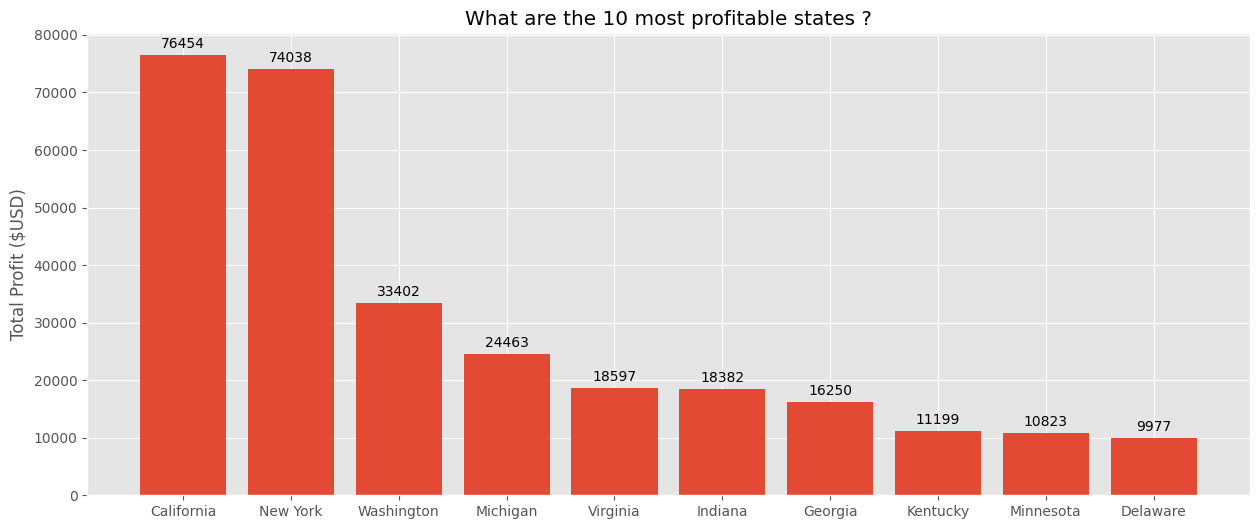

In [30]:
plt.style.use('ggplot')

# Top states
plt.figure(figsize=(15 , 6))
profit_per_top_state_bars = plt.bar(top_ten_profitable_state.index , top_ten_profitable_state['Total Profit'])
plt.bar_label(profit_per_top_state_bars , label_type='edge' , padding=3)
plt.ylabel("Total Profit ($USD)")
plt.title("What are the 10 most profitable states ?")
plt.savefig("figures/question_5(1)_fig.png") 
plt.show()

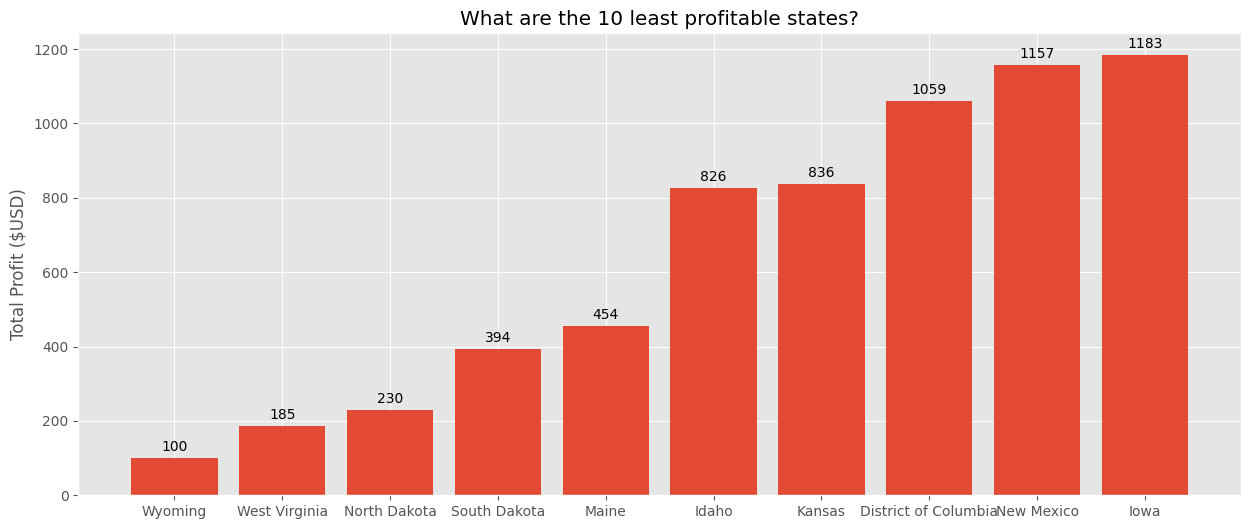

In [ ]:
plt.figure(figsize=(15 , 6))
profit_per_least_state_bars = plt.bar(least_10_profitable_state.index , least_10_profitable_state['Total Profit'])
plt.bar_label(profit_per_least_state_bars , label_type='edge' , padding=3)
plt.ylabel("Total Profit ($USD)")
plt.title("What are the 10 least profitable states?")
plt.savefig("figures/question_5(2)_fig.png") 
plt.show()